多層パーセプトロン（Multilayer perceptron、MLP）は、順伝播型ニューラルネットワークの一種であり、少なくとも3つのノードの層からなります。入力ノード以外の個々のノードは非線形活性化関数を使用するニューロンであり、誤差逆伝播法（バックプロパゲーション）と呼ばれる教師あり学習手法を利用することで、線形分離可能ではないデータを識別できます。非線形活性化関数として使われる関数のひとつに、シグモイド関数があります。

# あやめのデータ（3品種）を例に説明します。

In [1]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd

In [2]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
import urllib.request 

In [3]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url = "https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt"
urllib.request.urlretrieve(url, 'iris.txt') 

('iris.txt', <http.client.HTTPMessage at 0x121ae59b0>)

In [5]:
df = pd.read_csv("iris.txt", sep="\t", index_col=0)
print(df.shape) # 何行何列か確認する
df.head() # 先頭五行の内容を確認する

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


# scikit-learnを使う方法

まず、説明変数X と 目的変数Y に分割します。

In [6]:
X = np.array(df.iloc[:, :4].values) 
Y = np.array(df.iloc[:, 4])

sklearn の neural_network から MLPClassifier クラスをインポートし、MLPClassifier クラスのインスタンスを生成します。

In [7]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=10000)

X と Y の関係を学習します。

In [8]:
clf.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

予測精度 (accuracy score) は clf.score() で計算できます。

In [9]:
clf.score(X, Y)

0.98

損失（教師データと予測データとのズレ）の履歴は clf.loss_curve_ に保存されています。

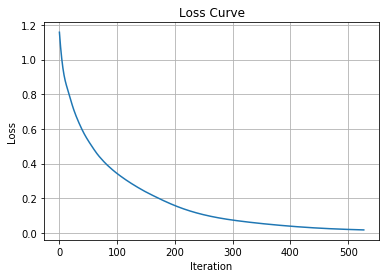

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Loss Curve")
plt.plot(clf.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()

予測結果は clf.predict() で求められます。学習に用いなかった新規データを与えれば、そのデータに対する新規予測を返します。

In [11]:
clf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

それぞれの予測に対する自信のほどは、clf.predict_proba() を使えば窺い知ることができます。

In [12]:
pd.DataFrame(clf.predict_proba(X)).head()

,0,1,2
0,0.999050,0.000950,1.762854e-10
1,0.995972,0.004028,2.084842e-09
2,0.998272,0.001728,9.007917e-10
3,0.995533,0.004467,4.888747e-09
4,0.999267,0.000733,1.519095e-10


このクラスで定義されているパラメーターは clf.get_params で確認できます。

In [13]:
clf.get_params

<bound method BaseEstimator.get_params of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)>

activationパラメータに入れられるのは、'sgd', 'adam', 'lbfgs' のいずれかです。solverパラメータに入れられるのは 'identity', 'logistic', 'tanh', 'relu' のいずれかです。何か適当な値に変換して計算し直してみましょう。デフォルトパラメータより良い値が出るでしょうか？

In [14]:
clf = MLPClassifier(max_iter=1000, hidden_layer_sizes=(10,), activation='logistic', solver='sgd', learning_rate_init=0.01)
clf.fit(X, Y)
clf.score(X, Y)

/Users/kot/miniconda3/envs/py3new/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.98

このときの Warning は、「まだ値が収束してないけど、いいの？」というWarningです。

## グリッドサーチを用いたハイパーパラメーターチューニング

ハイパーパラメーターとは、学習を行う前に人間があらかじめ設定しなければならないパラメーターです。これをうまく選ぶための方法の一つが、グリッドサーチです。グリッドサーチでは、考えうる全てのハイパーパラメーターの組み合わせを全通り計算して、最良の結果を出すハイパーパラメーターを選択します。

In [15]:
# 計算に2〜３分かかります。
!date
results = []
for hidden_layer_sizes in [10, 100, 1000]:
    for solver in ['sgd', 'adam', 'lbfgs']:
        for activation in ['identity', 'logistic', 'tanh', 'relu']:
            for learning_rate_init in [0.1, 0.01, 0.001]:
                clf = MLPClassifier(max_iter=10000, hidden_layer_sizes=(hidden_layer_sizes,), 
                                    activation=activation, solver=solver, learning_rate_init=learning_rate_init)
                clf.fit(X, Y)
                score = clf.score(X, Y)
                results.append([hidden_layer_sizes, activation, solver, learning_rate_init, score])
!date

2018年 12月14日 金曜日 16時56分12秒 JST
2018年 12月14日 金曜日 16時57分36秒 JST


In [16]:
pd.DataFrame([dat for dat in sorted(results, key=lambda f: f[4], reverse=True)],
            columns=["hidden_layer_sizes", "activation", "solver", "learning_rate_init", "score"])

,hidden_layer_sizes,activation,solver,learning_rate_init,score
0,10,logistic,lbfgs,0.100,1.000000
1,100,logistic,lbfgs,0.100,1.000000
2,100,logistic,lbfgs,0.010,1.000000
3,100,logistic,lbfgs,0.001,1.000000
4,100,tanh,lbfgs,0.100,1.000000
5,100,tanh,lbfgs,0.010,1.000000
6,100,tanh,lbfgs,0.001,1.000000
7,1000,logistic,lbfgs,0.001,1.000000
8,1000,tanh,lbfgs,0.100,1.000000
9,1000,tanh,lbfgs,0.010,1.000000


細かいことが知りたかったら次のように「？」を使って調べてください。たとえば、今回の計算は lbfgs の成績が良かったようですが、lbfgsとは何なのか？どういう特徴を持つのか？調べてみてください。

In [17]:
MLPClassifier?

## 過学習と交差検定

上の計算では、accuracy score が 1.0 (100%) になりました。それは完璧な予測モデルでしょうか？ いいえ、違います。このモデルは、知ってる問題は完璧に解けますが、未知の問題に対して対処できる保証は何もありません。機械学習の分野で「過学習」（過剰適合、overfitting）と呼ばれる現象です。これを解決するための方法論の一つとして「交差検定」があります。

機械学習ではその性能評価をするために、既知データを訓練データ（教師データ、教師セットともいいます）とテストデータ（テストセットともいいます）に分割します。訓練データを用いて訓練（学習）して予測モデルを構築し、その予測モデル構築に用いなかったテストデータをどのくらい正しく予測できるかということで性能評価を行ないます。そのような評価方法を「交差検定」(cross-validation)と呼びます。ここでは、

* 訓練データ（全データの６０％）
     * __X_train__ : 訓練データの説明変数
     * __Y_train__ : 訓練データの目的変数
* テストデータ（全データの４０％）
     * __X_test__ : テストデータの説明変数
     * __Y_test__ : テストデータの目的変数

とし、__X_train__ と __Y_train__ の関係を学習して __X_test__ から __Y_test__ を予測することを目指します。

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40)

In [19]:
clf = MLPClassifier(max_iter=10000)
clf.fit(X_train, Y_train)
print("Accuracy score (train):", clf.score(X_train, Y_train))
print("Accuracy score (test):", clf.score(X_test, Y_test))

Accuracy score (train): 1.0
Accuracy score (test): 0.95


普通はこれを何度も繰り返して、グリッドサーチなどのチューニング方法と組み合わせて、テストデータに対する accuracy score が最良のモデルを選択します。

# scikit-learnを使わない方法

以上、多層パーセプトロンと、多層パーセプトロンだけでなく機械学習手法全般に関する事柄を、scikit-learnを使って説明しました。次は scikit-learnを使わずに多層パーセプトロンを実装することにより、多層パーセプトロンの中身の理解を目指したいと思います。

In [20]:
def one_hot_vectors(V): # one hot vector に変換する
    T = pd.DataFrame([])
    T[0] = [1 if v == 0 else 0 for v in V]
    T[1] = [1 if v == 1 else 0 for v in V]
    T[2] = [1 if v == 2 else 0 for v in V]
    return np.array(T)

In [21]:
X = np.array(df.iloc[:, :4].values)
Y = one_hot_vectors(df.iloc[:, 4])

## 自前 MLP クラスの作成

In [62]:
class MyMLP:
    def __init__(self, input_layer_size, hidden_layer_size, output_layer_size):
        init_weight = 0.01 # ランダムな初期値に対してちょっとバラツキを控えめにする
        
        # 隠れ層の重み行列W1とバイアスb1
        self.W1 = init_weight * np.random.randn(input_layer_size, hidden_layer_size)
        self.b1 = np.zeros(hidden_layer_size)
        self.a1 = [] # 隠れ層が保持する値（シグモイド関数による変換前）
        self.z1 = [] # 隠れ層が保持する値（シグモイド関数による変換後）

        # 出力層の重み行列W1とバイアスb1
        self.W2 = init_weight * np.random.randn(hidden_layer_size, output_layer_size)
        self.b2 = np.zeros(output_layer_size)
        self.a2 = [] # 出力層が保持する値（ソフトマックス関数による変換前）
        self.z2 = [] # 出力層が保持する値（ソフトマックス関数による変換後）
        
        self.loss_ = -1 # 誤差
        self.loss_curve_ = [] # 誤差の履歴
        
        print("W1.shape=", self.W1.shape)
        print("b1.shape=", self.b1.shape)
        print("W2.shape=", self.W2.shape)
        print("b2.shape=", self.b2.shape)
        
    def forward_propagation(self, x): # 前向き計算
        self.a1 = np.dot(x, self.W1) + self.b1 # 入力層からの入力と重み行列との線形和＋バイアス
        self.z1 = sigmoid(self.a1) # シグモイド関数で変換して隠れ層からの出力とする
        self.a2 = np.dot(self.z1, self.W2) + self.b2 # 隠れ層からの入力と重み行列との線形和＋バイアス
        self.z2 = softmax(self.a2) # ソフトマックス関数で変換して出力層からの出力とする
        return self.z2 # 出力層からの出力を予測結果とする
                            
    def backward_propagation(self, x, y_pred, y_real): # 後ろ向き計算
        grads = Gradient() # 重み行列を修正するための勾配を取りまとめるクラス
        batch_num = x.shape[0] # 入力データの総数
        dy = (y_pred - y_real) / batch_num # 全データに対して誤差を算出し、データ総数で割る
        grads.W2 = np.dot(self.z1.T, dy) # 出力層の重み行列W2を修正するための勾配
        grads.b2 = np.sum(dy, axis=0) # 出力層のバイアスb2を修正するための勾配
        dz1 = np.dot(dy, self.W2.T) # 隠れ層を修正するための誤差
        da1 = sigmoid_gradient(self.a1) * dz1 # 隠れ層を修正するための勾配
        grads.W1 = np.dot(x.T, da1) # 隠れ層の重み行列W1を修正するための勾配
        grads.b1 = np.sum(da1, axis=0) # 隠れ層のバイアスb1を修正するための勾配
        return grads # 計算した勾配をまとめて返す

    # x:入力データ, t:教師データ
    def loss(self, x, y_real): # 予測結果と本当の値とのクロスエントロピー誤差を損失関数とする
        self.loss_ = cross_entropy_error(self.forward_propagation(x), y_real)
        return self.loss_
    
    def score(self, x, y_real): # accuracy score
        y_real = np.argmax(y_real, axis=1) 
        y_pred = np.argmax(self.forward_propagation(x), axis=1)
        accuracy = np.sum(y_pred == y_real) / float(x.shape[0])
        return accuracy

class Gradient: # 重み行列を修正するための勾配を取りまとめるクラス
    def __init__(self):
        self.W1 = np.array([])
        self.b1 = np.array([])
        self.W2 = np.array([])
        self.b2 = np.array([])

## いくつかの重要関数

### sigmoid 関数

In [64]:
def sigmoid(x): # シグモイド関数
    return 1 / (1 + np.exp(-x))

In [65]:
sigmoid(5)

0.9933071490757153

In [66]:
x = np.array([[0.1, 0.2, 0.9], [0.3, 0.4, 0.5], [0.7, 0.6, 0.1]])
sigmoid(x)

array([[0.52497919, 0.549834  , 0.7109495 ],
       [0.57444252, 0.59868766, 0.62245933],
       [0.66818777, 0.64565631, 0.52497919]])

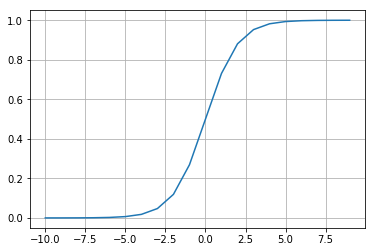

In [67]:
a = [x for x in range(-10, 10)]
b = [sigmoid(x) for x in range(-10, 10)]
plt.plot(a, b)
plt.grid()
plt.show()

### sigmoid_gradient 関数

In [68]:
def sigmoid_gradient(x): # シグモイド関数の勾配ではないが、これがミソ
    return (1.0 - sigmoid(x)) * sigmoid(x)

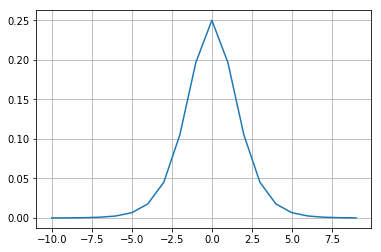

In [69]:
a = [x for x in range(-10, 10)]
b = [sigmoid_gradient(x) for x in range(-10, 10)]
plt.plot(a, b)
plt.grid()
plt.show()

### Softmax 関数

In [70]:
def softmax(x): # 和が1になるように変換することで「確率」としての取り扱いを可能にする
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [71]:
x = np.array([[1, 2, 3], [3, 4, 5]])
softmax(x)

array([[0.09003057, 0.24472847, 0.66524096],
       [0.09003057, 0.24472847, 0.66524096]])

In [72]:
softmax(x).sum(axis=1)

array([1., 1.])

### クロスエントロピー誤差

In [73]:
def cross_entropy_error(y_pred, y_real): # クロスエントロピー誤差
    if y_real.ndim == 1:
        y_real = y_real.reshape(1, t.size)
        y_pred = y_pred.reshape(1, y.size)
    if y_real.size == y_pred.size:
        y_real = y_real.argmax(axis=1)
    batch_size = y_pred.shape[0]
    return -np.sum(np.log(y_pred[np.arange(batch_size), y_real] + 1e-8)) / batch_size

In [74]:
net = MyMLP(input_layer_size=4, hidden_layer_size=3, output_layer_size=3)

W1.shape= (4, 3)
b1.shape= (3,)
W2.shape= (3, 3)
b2.shape= (3,)


## 実際の学習手順

In [35]:
iters_num = 5000  # 繰り返しの回数
learning_rate = 0.1 # 学習率

In [36]:
accuracy_curve = []
for i in range(iters_num):
    Y_pred = net.forward_propagation(X) # 前向き計算
    grad = net.backward_propagation(X, Y_pred, Y) # 後ろ向き計算
    net.W1 -= learning_rate * grad.W1 # 隠れ層の重み行列W1を微修正
    net.b1 -= learning_rate * grad.b1 # 隠れ層のバイアスb1を微修正
    net.W2 -= learning_rate * grad.W2 # 出力層の重み行列W2を微修正
    net.b2 -= learning_rate * grad.b2 # 出力層のバイアスb2を微修正
    accuracy_curve.append(net.score(X, Y)) # 正解率の履歴を記録
    net.loss_curve_.append(net.loss(X, Y)) # 誤差の履歴を記録

### 正解率

In [37]:
net.score(X,Y)

0.98

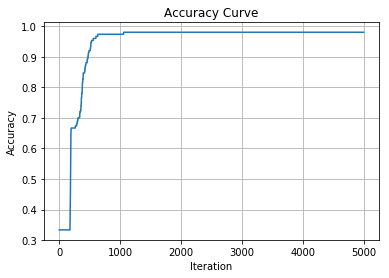

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Accuracy Curve")
plt.plot(accuracy_curve)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

 ### 損失（誤差）

In [38]:
net.loss(X,Y)

0.06510128095476939

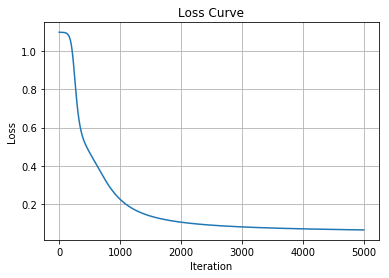

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title("Loss Curve")
plt.plot(net.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()

### 学習済みの重み行列とバイアス

In [43]:
net.W1

array([[ 1.75773083, -0.51518424, -1.27918798],
       [ 1.73947899, -1.74152022, -1.53733161],
       [-2.6436301 ,  2.73684801,  2.09798004],
       [-3.16874639,  1.30283781,  2.40213952]])

In [47]:
net.b1

array([ 1.93251018, -0.33044046, -1.44066299])

In [44]:
net.W2

array([[ 3.52793736,  2.00952545, -5.52639495],
       [-5.4866828 ,  3.5463848 ,  1.94412222],
       [-2.94702133, -1.64553748,  4.57965808]])

In [48]:
net.b2

array([ 1.79476641, -1.32993924, -0.46482716])

### 予測結果

In [45]:
net.forward_propagation(X)

array([[9.89838688e-01, 1.01485881e-02, 1.27236547e-05],
       [9.88762250e-01, 1.12239218e-02, 1.38286276e-05],
       [9.89471490e-01, 1.05154049e-02, 1.31051691e-05],
       [9.88232680e-01, 1.17529506e-02, 1.43692525e-05],
       [9.89910932e-01, 1.00764188e-02, 1.26492384e-05],
       [9.89674961e-01, 1.03121466e-02, 1.28922736e-05],
       [9.89355530e-01, 1.06312436e-02, 1.32267515e-05],
       [9.89425542e-01, 1.05613080e-02, 1.31497377e-05],
       [9.87758239e-01, 1.22269079e-02, 1.48528401e-05],
       [9.88816856e-01, 1.11693727e-02, 1.37711819e-05],
       [9.89966857e-01, 1.00205525e-02, 1.25900857e-05],
       [9.88928482e-01, 1.10578587e-02, 1.36597320e-05],
       [9.88897767e-01, 1.10885431e-02, 1.36901738e-05],
       [9.89588566e-01, 1.03984471e-02, 1.29871247e-05],
       [9.90350690e-01, 9.63711894e-03, 1.21912159e-05],
       [9.90294753e-01, 9.69299771e-03, 1.22496608e-05],
       [9.90197222e-01, 9.79042638e-03, 1.23516946e-05],
       [9.89750885e-01, 1.02363

In [46]:
np.argmax(net.forward_propagation(X), axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])